<a href="https://colab.research.google.com/github/Aggarwalmansi/GENAI/blob/main/lab2feb26(neural_net_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# data creation
X,y = make_circles(n_samples=1000, noise = 0.05 , factor = 0.5 , random_state = 42)

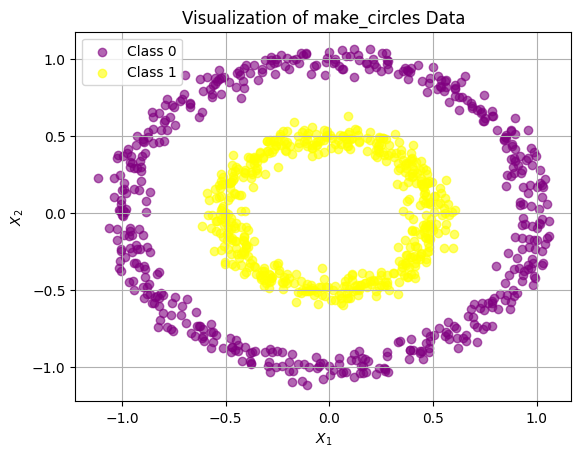

In [ ]:
# creat a scatter plot
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.6,color = 'purple')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.6, color = 'yellow')
plt.title('Visualization of make_circles Data')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid(True)

In [ ]:
def plot_graph(model, X, y, title):
# Step 1: Create a grid (the background map) from -1.5 to 1.5
# We use 100 points for x and 100 points for y
  grid = np.linspace(-1.5, 1.5, 100)
  xx, yy = np.meshgrid(grid, grid)

# Step 2: Flatten the grid to pass it into the model
# ".ravel()" flattens the array, "np.column_stack" puts them together
  all_points = np.column_stack([xx.ravel(), yy.ravel()])

  # Step 3: Predict the color for every point on the grid
  preds = model.predict(all_points, verbose=0)
  Z = preds.round().reshape(xx.shape)

  # Step 4: Draw the background colors and the actual data dots
  plt.contourf(xx, yy, Z, alpha=0.3) # Background
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k') # Data dots
  plt.title(title)

In [ ]:
slp_model = Sequential([
    Dense(1,input_shape = (2,), activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# loss is an error , binary_crossentropy is the type of error .
from tensorflow.keras.models import Sequential
slp_model = Sequential([
    Dense(1,input_shape = (2,), activation = 'sigmoid')
])
slp_model.compile(loss = 'binary_crossentropy',metrics=['accuracy'])
slp_model.fit(X,y,epochs=50,verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5058 - loss: 0.7458
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 0.7328
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5041 - loss: 0.7353
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - loss: 0.7340 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 0.7369 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 0.7287
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5058 - loss: 0.7253
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4947 - loss: 0.7323 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4843 - loss: 0.7309 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4912 - loss: 0.7288 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4898 - loss: 0.7328 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5132 - loss: 0

In [ ]:
# Calculate final accuracy
slp_loss, slp_acc = slp_model.evaluate(X, y, verbose=0)
print(f"SLP Accuracy: {slp_acc*100:.2f}%")


SLP Accuracy: 50.60%


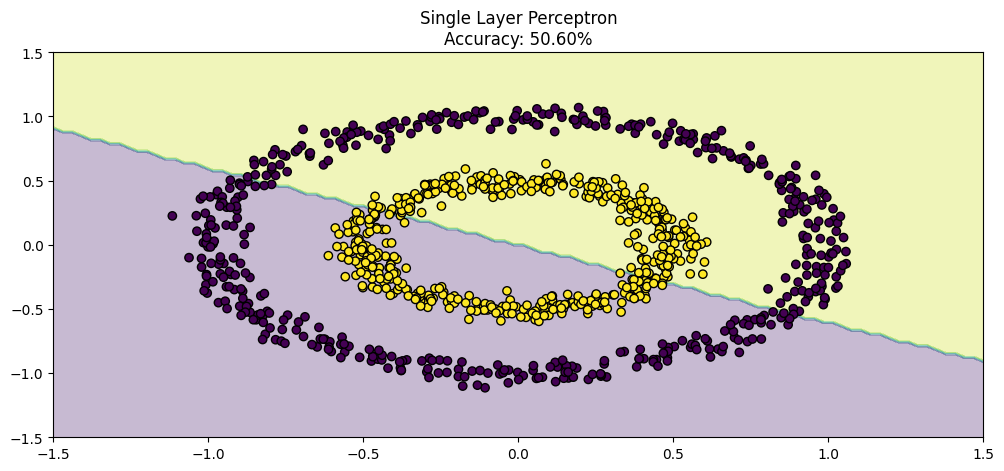

In [ ]:
plt.figure(figsize=(12, 5))

plot_graph(slp_model, X, y, title=f"Single Layer Perceptron\nAccuracy: {slp_acc*100:.2f}%")

#### perceptron fails as it can work on linear data only. lets work on multi layer perceptron



In [ ]:
mlp_model = Sequential([
    Dense(16,input_shape = (2,), activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1,activation='sigmoid')
])

mlp_model.compile(loss = 'binary_crossentropy',metrics=['accuracy'])
mlp_history = mlp_model.fit(X,y,epochs=50,verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5162 - loss: 0.7163
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4167 - loss: 0.6973 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4628 - loss: 0.6830
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4970 - loss: 0.6685
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5233 - loss: 0.6554 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6257 - loss: 0.6371 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 0.6151 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.5935 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8184 - loss: 0.5648 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9084 - loss: 0.5235 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.4804
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 

In [ ]:
# Calculate final accuracy
mlp_loss, mlp_acc = mlp_model.evaluate(X, y, verbose=0)
print(f"MLP Accuracy: {mlp_acc*100:.2f}%")

MLP Accuracy: 100.00%


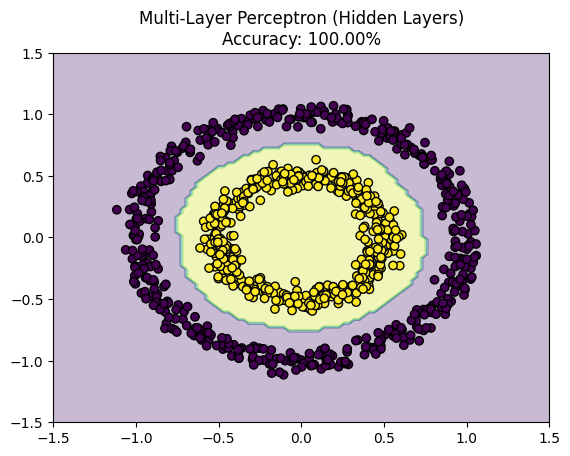

In [ ]:
plot_graph(mlp_model, X, y, title=f"Multi-Layer Perceptron (Hidden Layers)\nAccuracy: {mlp_acc*100:.2f}%")

plt.show()